In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
#import numpy as np
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [2]:
os.getcwd()

'/Users/lajoyce/Documents/genomics/epiage/BayesAge'

In [3]:
df = pd.read_csv("/Users/lajoyce/Documents/genomics/epiage/BayesAge/data/sample_458_age.csv", sep = "\t")

df.head(5)

/var/folders/bz/x865_p_5033ds1dp07zb8qn00000gn/T/ipykernel_79189/2738422727.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/lajoyce/Documents/genomics/epiage/BayesAge/data/sample_458_age.csv", sep = "\t")


,sampleID,chr1_100424052,chr1_100424116,chr1_100718749,chr1_100718777,chr1_100719693,chr1_100719742,chr1_100719744,chr1_100719756,chr1_100719847,...,chrX_70133602,chrX_70133614,chrX_72573198,chrX_72573200,chrX_72573216,chrX_91434796,chrX_91434801,chrX_91434803,chrX_91434826,Age
0,P41019081704087,0.093842,0.026515,0.006906,0.174535,0.319149,0.697318,0.483591,0.336207,0.306792,...,0.003676,0.000000,0.002294,0.008830,0.001996,0.000000,0.018405,0.011905,0.045161,34.0
1,P41019081704090,0.010256,0.000000,0.000000,0.235808,0.460432,0.796334,0.675676,0.520737,0.512941,...,0.442708,0.423913,0.216117,0.282609,0.081356,0.189944,0.182796,0.126316,0.225806,46.0
2,P41019081704100,0.325843,0.010204,0.038961,0.226776,0.682594,0.790660,0.724473,0.550918,0.646091,...,0.423963,0.228856,0.211356,0.389571,0.167082,0.127072,0.237838,0.088083,0.148352,47.0
3,P41019081704106,0.117647,0.034274,0.054332,0.157618,0.399802,0.780488,0.532505,0.465587,0.429896,...,0.326284,0.355224,0.244514,0.376582,0.181440,0.132000,0.083019,0.136364,0.094862,38.0
4,P41019081704108,0.045213,0.006135,0.032438,0.197802,0.350000,0.743935,0.582768,0.435679,0.396048,...,0.418874,0.344068,0.246377,0.378438,0.180915,0.078947,0.080235,0.084778,0.058601,47.0


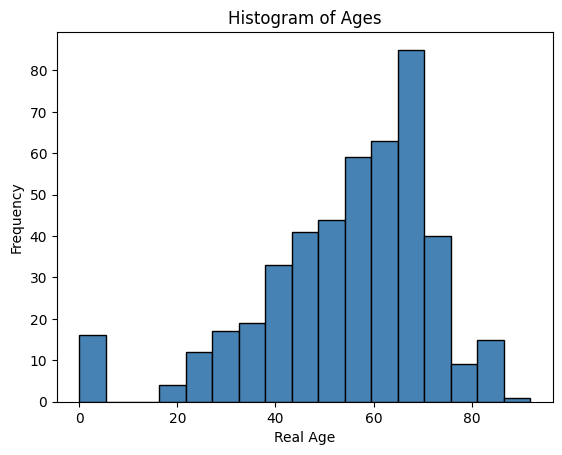

In [10]:
plt.hist(df["Age"], bins='auto', color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('Real Age')
plt.ylabel('Frequency')
plt.title(f'Histogram of Ages')


plt.savefig("/Users/lajoyce/Documents/genomics/epiage/BayesAge/reviews/histogram_of_ages.png", dpi = 300, bbox_inches = 'tight')
# Show the plot
plt.show()

### LASSO & EPM Scatter & Residual Plots

In [12]:
from PIL import Image
import os

In [13]:
os.chdir("/Users/lajoyce/Desktop/frontiers figures")

In [23]:
image_paths = ["/Users/lajoyce/Desktop/paper_figs/CV_lasso_scatter_plots.png",
            "/Users/lajoyce/Desktop/paper_figs/LASSO_residuals_lowess_fit.png", 
            "/Users/lajoyce/Desktop/paper_figs/epigenetic_pacemaker_scatter_plot_top_107_cpg_sites.png", 
            "/Users/lajoyce/Desktop/paper_figs/epigenetic_pacemaker_residual_lowess_fit.png"]

In [35]:
def pad_image(image, target_width, target_height):
    # Calculate padding values
    left_padding = (target_width - image.width) // 2
    top_padding = (target_height - image.height) // 2

    # Create a new image with the target dimensions
    padded_image = Image.new('RGB', (target_width, target_height), (255, 255, 255))

    # Paste the original image onto the padded image
    padded_image.paste(image, (left_padding, top_padding))

    return padded_image

def concatenate_images(image_paths, output_path):
    # Open all four images
    images = [Image.open(image_path) for image_path in image_paths]

    # Find the maximum dimensions among all images
    max_width = max(image.width for image in images)
    max_height = max(image.height for image in images)

    # Pad each image to the maximum dimensions
    padded_images = [pad_image(image, max_width, max_height) for image in images]

    # Calculate the width and height of the concatenated image
    new_width = 2 * max_width
    new_height = 2 * max_height

    # Create a new image with the calculated dimensions
    new_img = Image.new('RGB', (new_width, new_height), (255, 255, 255))

    # Paste each padded image onto the new image
    for i in range(2):
        for j in range(2):
            index = i * 2 + j
            new_img.paste(padded_images[index], (j * max_width, i * max_height))

    # Save the concatenated image
    new_img.save(output_path)

# Example usage:
#image_paths = ["image1.png", "image2.png", "image3.png", "image4.png"]
concatenate_images(image_paths, "output.png")


# 1 Million Downsampling

In [36]:
def pad_image(image, target_width, target_height):
    # Calculate padding values
    left_padding = (target_width - image.width) // 2
    top_padding = (target_height - image.height) // 2

    # Create a new image with the target dimensions
    padded_image = Image.new('RGB', (target_width, target_height), (255, 255, 255))

    # Paste the original image onto the padded image
    padded_image.paste(image, (left_padding, top_padding))

    return padded_image

def concatenate_images(image_paths, output_path):
    # Open all eight images
    images = [Image.open(image_path) for image_path in image_paths]

    # Find the maximum dimensions among all images
    max_width = max(image.width for image in images)
    max_height = max(image.height for image in images)

    # Pad each image to the maximum dimensions
    padded_images = [pad_image(image, max_width, max_height) for image in images]

    # Calculate the width and height of the concatenated image
    new_width = 4 * max_width
    new_height = 2 * max_height

    # Create a new image with the calculated dimensions
    new_img = Image.new('RGB', (new_width, new_height), (255, 255, 255))

    # Paste each padded image onto the new image
    for i in range(2):
        for j in range(4):
            index = i * 4 + j
            new_img.paste(padded_images[index], (j * max_width, i * max_height))

    # Save the concatenated image
    new_img.save(output_path)


In [39]:
# Example usage:
image_paths = ["/Users/lajoyce/Desktop/paper_figs/1million_scAge_458_sample_10_fold_cv_top_8_CpGs_downsampling.png", 
               "/Users/lajoyce/Desktop/paper_figs/BayesAge_1million_downsampling.png", 
               "/Users/lajoyce/Desktop/paper_figs/1million_CV_lasso_scatter_plots.png",
               "/Users/lajoyce/Desktop/paper_figs/EPM_scatter_plot_top_107_cpg_sites_1million_downsampling.png",
               "/Users/lajoyce/Desktop/paper_figs/scAge_1million_residuals.png",
               "/Users/lajoyce/Desktop/paper_figs/BayesAge_1million_downsampling_residuals.png", 
                "/Users/lajoyce/Desktop/paper_figs/LASSO_residuals_1million.png",
                "/Users/lajoyce/Desktop/paper_figs/EPM_1million_downsampling_residuals.png"]


In [40]:
concatenate_images(image_paths, "scAge_BayesAge_LASSO_EPM.png")

# 100K Downsampling

In [41]:
# Example usage:
image_paths = ["/Users/lajoyce/Desktop/paper_figs/hundred_thousand_scAge_458_sample_10_fold_cv_top_8_CpGs_downsampling.png", 
               "/Users/lajoyce/Desktop/paper_figs/BayesAge_100k_downsampling_scatterplot.png", 
               "/Users/lajoyce/Desktop/paper_figs/hundred_thousand_CV_lasso_delta_age.png",
               "/Users/lajoyce/Desktop/paper_figs/EPM_scatter_plot_top_100_cpg_sites_100k_downsampling.png",
               "/Users/lajoyce/Desktop/paper_figs/scAge_hundred_thousand_residuals.png",
               "/Users/lajoyce/Desktop/paper_figs/BayesAge_100K_downsampling_residuals.png", 
                "/Users/lajoyce/Desktop/paper_figs/LASSO_residuals_hundred_thousand.png",
                "/Users/lajoyce/Desktop/paper_figs/EPM_100k_downsampling_residuals.png"]

In [42]:
concatenate_images(image_paths, "scAge_BayesAge_LASSO_EPM_100K.png")